# Assignment 3 - more pitching#
#### CSCI 4831 - Sabermetrics ####
#### Instructor: Hoenigman ####
#### Due: Wednesday, March 6 by 3pm ####

Name: Michael Dresser

**Use any of the datasets we've learned about so far to complete this assignment.** 

**Submit your notebook to the Assignment 3 link on Canvas. Include all csv files that you generate with your submission.**

## Pitching ###
In Assignment 2, you evaluated 5 Rockies pitchers by comparing pitch selection and movement of their pitches at home and away. In this next assignment, you will also evaluate pitchers in different environments or at different times. The specifics of how you do that are up to you. Your assignment needs to fulfill the following high-level objectives.

### 1. Pitchers to compare ###
(10 pts) You need pitchers that you will compare. Examples include groups of pitchers compared to other groups, an individual pitcher compared to another individual, or one pitcher compared to himself at different times in his career. 

### 2. Reason for your comparison ###
(10 pts) You need to have a reason for why you think the comparison is meaningful. For example, you might compare the star pitcher from a hitters park to the star pitcher at a pitchers park. This comparison could be meaningful to evaluate the effect of the run-scoring environment on their approach to pitching. A comparison that wouldn't be meaningful is average pitcher A compared to average pitcher B, both on average teams. That's not a result that anyone would care about. 

### 3. Basis for comparison ###
(30 pts) You need to describe how the pitchers will be compared and then implement your comparison. Examples of comparison include pitch movement and selection, BABIP, BABIP on specific pitches, OBP in different environments. Choose at least three criteria for pitcher comparison. 

### 4. Data for comparison ###
(10 pts) Focus on starting pitchers only because you will have more data. Use 3-5 years of data for each pitcher or time period. A pitcher will need to have at least 3 years of data to be used in this assignment.

### 5. Analysis ###
(20 pts) Your comparison needs to include a basic statistical analysis, such as t-tests, z-tests, and/or confidence intervals. You also need at least one visual presentation of your data, such as a histogram, bar chart, or line graph. Your visual should be appropriate for the type of data being displayed.

### 6. Presentation ###
(20 pts) You need a 2-page writeup explaining what you did and your results. Your presentation should have clearly marked sections for 

* Introduction
* Problem Definition
* Data
* Results

### Other notes ###
* Proofread your writeup for typos and proper grammar. 
* If you compare pitch movement, use the statcast fields for vx0, vz0, ax, az, plate_x, plate_z variables instead of pfx_x, pfx_z, I'm not sure what those do.
* Include all code and the writeup together in one notebook.

### Pitchers to Compare

I will be comparing pitchers in the NL in the 1970s to pitchers in the NL in the 2000s. They will be compared on the basis of their batting statistics.

### Reason for Comparison

My hypothesis is that with the advent of heavy statistics in baseball, pitchers' batting performance is less valued by teams due to the massive importance of pitching performance and thus has gone down.

### Basis for Comparison

Pitchers will be compared based on on-base percentage, slugging percentage, and sac hits per plate appearance. OBP and SLG are self-explanatory, but I find sac hits also interesting because pitchers often bunt.

### Data

I will be using the Lahman database to pull pitching and batting data. I will only be considering pitchers who had more than 10 at bats in a season.

### Analysis and Presentation

Will follow the below code section.

In [1]:
from pybaseball.lahman import batting
from pybaseball.lahman import pitching

b = batting()
p = pitching()

In [3]:
b = b.loc[b["lgID"] == "NL"]
p = p.loc[p["lgID"] == "NL"]

In [6]:
b_70 = b.loc[(b["yearID"] >= 1970) & (b["yearID"] < 1980)]
p_70 = p.loc[(p["yearID"] >= 1970) & (p["yearID"] < 1980)]

b_00 = b.loc[(b["yearID"] >= 2000) & (b["yearID"] < 2010)]
p_00 = p.loc[(p["yearID"] >= 2000) & (p["yearID"] < 2010)]

In [8]:
pitcher_batting_70s = b_70.loc[(b_70["playerID"].isin(p_70["playerID"]))]
pitcher_batting_00s = b_00.loc[(b_00["playerID"].isin(p_00["playerID"]))]

In [12]:
pb_70s = pitcher_batting_70s.groupby(["playerID", "yearID"]).sum()
pb_00s = pitcher_batting_00s.groupby(["playerID", "yearID"]).sum()

In [20]:
pb_70s = pb_70s.loc[(pb_70s["AB"] > 10)].copy()
pb_00s = pb_00s.loc[(pb_00s["AB"] > 10)].copy()

In [21]:
def get_obp_series(df):
    return (df["H"] + df["BB"] + df["HBP"]) / (df["AB"] + df["BB"] + df["HBP"] + df["SF"])

def get_slg_series(df):
    singles = df["H"] - df["HR"] - df["2B"] - df["3B"]
    return (singles + 2*df["2B"] + 3*df["3B"] + 4*df["HR"]) / df["AB"]

def get_SH_per_PA_series(df):
    PA = df["AB"] + df["BB"] + df["HBP"] + df["SH"] + df["SF"]
    return df["SH"] / PA

In [25]:
pb_70s["OBP"] = get_obp_series(pb_70s)
pb_00s["OBP"] = get_obp_series(pb_00s)

pb_70s["SLG"] = get_slg_series(pb_70s)
pb_00s["SLG"] = get_slg_series(pb_00s)

pb_70s["SH/PA"] = get_SH_per_PA_series(pb_70s)
pb_00s["SH/PA"] = get_SH_per_PA_series(pb_00s)

In [40]:
pb_70s_noplayer = pb_70s.copy()
pb_70s_noplayer.index = pb_70s_noplayer.index.droplevel()
pb_00s_noplayer = pb_00s.copy()
pb_00s_noplayer.index = pb_00s_noplayer.index.droplevel()

In [27]:
import matplotlib.pyplot as plt

In [71]:
def plot_vs_scatter(df70s, df00s, colname):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))

    ax.set_title("1970s vs 2010s Pitcher %s" % colname)
    ax.set_xlabel("Year")
    ax.set_ylabel(colname)
    ax.scatter(df70s.index, df70s[colname], color="blue", label="1970s")
    ax.scatter(df00s.index, df00s[colname], color="red", label="2010s")
    ax.legend()

def plot_vs_hist(df70s, df00s, colname):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    ax.set_title("1970s vs 2010s Pitcher %s" % colname)
    ax.set_xlabel(colname)
    ax.set_ylabel("count")
    ax.hist(df70s[colname], color="blue", alpha=0.7, label="1970s")
    ax.hist(df00s[colname], color="red", alpha=0.7, label="2000s")
    ax.legend()

In [64]:
import scipy.stats as stats
import numpy as np

def calc_diffmeans_column_CI(df1, df2, colname, alpha=0.05):
    s1 = df1[colname]
    s2 = df2[colname]
    
    diff = s1.mean() - s2.mean()
    z_crit = stats.norm.ppf(1 - alpha / 2)
    sqrt_thing = np.sqrt((s1.var() / len(s1)) + 
                         (s2.var() / len(s2)))
    
    return (diff - z_crit*sqrt_thing, diff + z_crit*sqrt_thing)

In [74]:
CI_OBP_95 = calc_diffmeans_column_CI(pb_00s_noplayer, pb_70s_noplayer, "OBP", alpha=0.05)
CI_OBP_90 = calc_diffmeans_column_CI(pb_00s_noplayer, pb_70s_noplayer, "OBP", alpha=0.1)
CI_SLG_95 = calc_diffmeans_column_CI(pb_00s_noplayer, pb_70s_noplayer, "SLG", alpha=0.05)
CI_SLG_90 = calc_diffmeans_column_CI(pb_00s_noplayer, pb_70s_noplayer, "SLG", alpha=0.1)
CI_SHPA_95 = calc_diffmeans_column_CI(pb_00s_noplayer, pb_70s_noplayer, "SH/PA", alpha=0.05)
CI_SHPA_90 = calc_diffmeans_column_CI(pb_00s_noplayer, pb_70s_noplayer, "SH/PA", alpha=0.1)

## Batting Performance of Pitchers: 1970s vs 2000s

#### Introduction

I wanted to investigate how the batting performance of pitchers compared from the 1970s to the 2010s. My hypothesis is that the batting performance of pitchers would have declined. This is because, as far as I can tell, the majority of a pitcher's value comes from their pitching, not batting, performance. I assume that the advent of statistics taking over baseball would have resulted in teams valuing a pitcher's batting less, thus taking it into less consideration for both signing and training players.

#### Problem Definition

Using the Lahman database of pitching and batting, I will be comparing the OBP, SLG, and sac hits per plate appearance (a custom statistic) for all NL pitchers in the 1970s and the 2000s. I choose sac hits per plate appearance as a third method of comparison because I think it will be interesting to compare. Pitchers these days seem to bunt a lot and I wonder if that is a recent phenomenon. I will be using confidence intervals to determine statistical significance of differences between the two decades.

#### Data

Data comes from the Lahman database of pitching and batting. I selected all batting records from 1970-1979 (inclusive) for players who were pitchers during that same time period. I did the same for 2000-2009 (inclusive) for the 2000s players. If a player played on multiple teams during one year, his stats were combined to produce one record for each year for each player. If any player had less than 11 at bats in one year, his record for that year was not considered.

#### Results

##### OBP

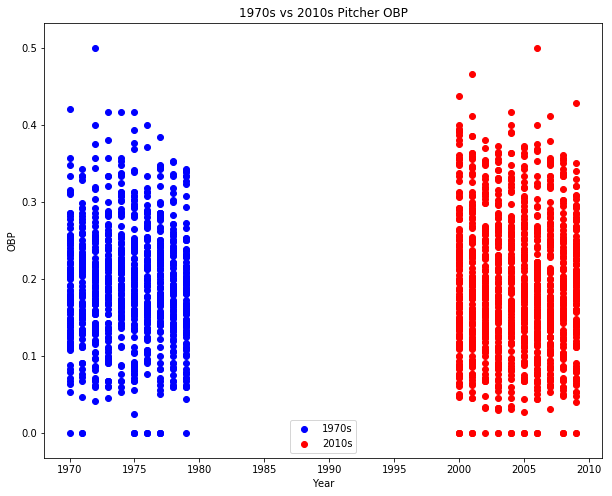

In [72]:
plot_vs(pb_70s_noplayer, pb_00s_noplayer, "OBP")

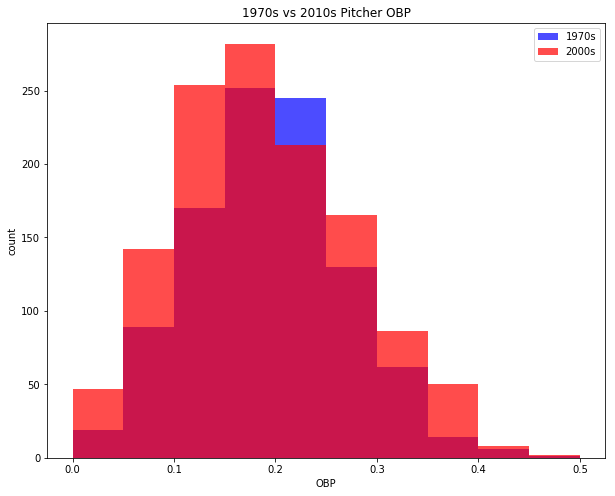

In [73]:
plot_vs_hist(pb_70s_noplayer, pb_00s_noplayer, "OBP")

In [76]:
print("95% CI for difference of means(2000s - 1970s): OBP\n", CI_OBP_95)
print("90% CI for difference of means(2000s - 1970s): OBP\n", CI_OBP_90)

95% CI for difference of means(2000s - 1970s): OBP
 (-0.010439487251145107, 0.003042627807309994)
90% CI for difference of means(2000s - 1970s): OBP
 (-0.009355703536079252, 0.001958844092244139)


Graphically, it is difficult to see any meaningful difference in OBP distribution between the 1970s and 2000s. The confidence intervals back this up: at neither the 95% nor the 90% confidence level can we say anything meaningful about the difference of means (0 is contained in both CIs).

##### SLG

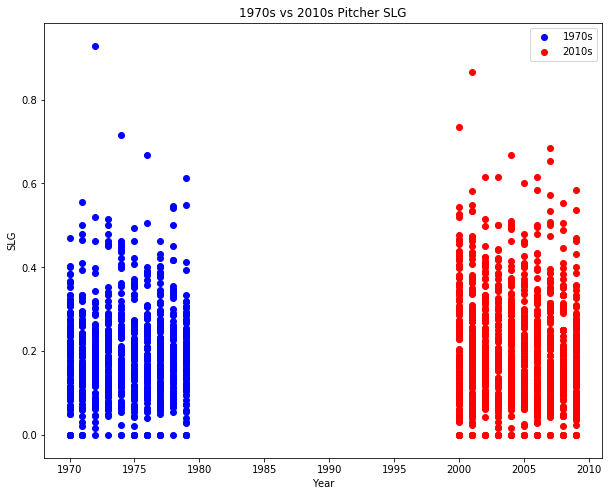

In [77]:
plot_vs(pb_70s_noplayer, pb_00s_noplayer, "SLG")

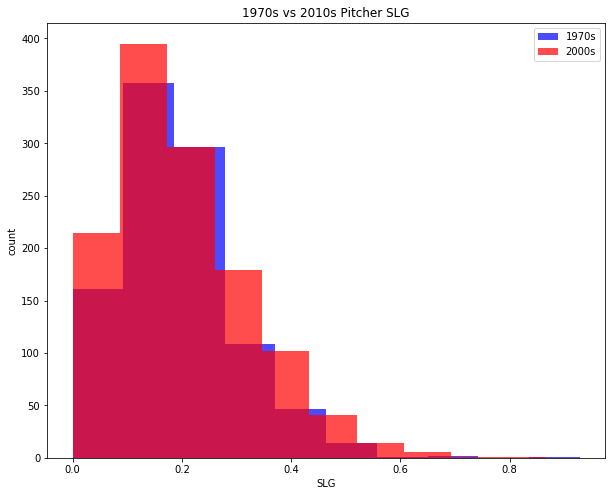

In [78]:
plot_vs_hist(pb_70s_noplayer, pb_00s_noplayer, "SLG")

In [79]:
print("95% CI for difference of means(2000s - 1970s): SLG\n", CI_SLG_95)
print("90% CI for difference of means(2000s - 1970s): SLG\n", CI_SLG_90)

95% CI for difference of means(2000s - 1970s): SLG
 (-0.0038952851907537254, 0.015533543785431878)
90% CI for difference of means(2000s - 1970s): SLG
 (-0.0023334643372827993, 0.013971722931960952)


Once more, neither the graphical representations nor the confidence intervals say anything meaningful about the difference between the two sets of pitchers.

##### Sac hits per plate appearance

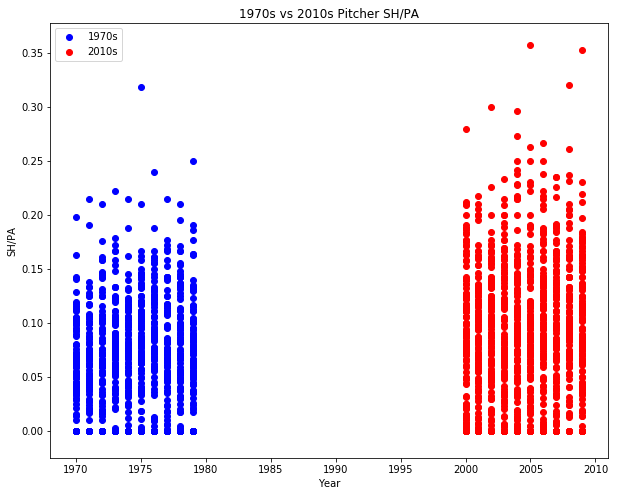

In [80]:
plot_vs(pb_70s_noplayer, pb_00s_noplayer, "SH/PA")

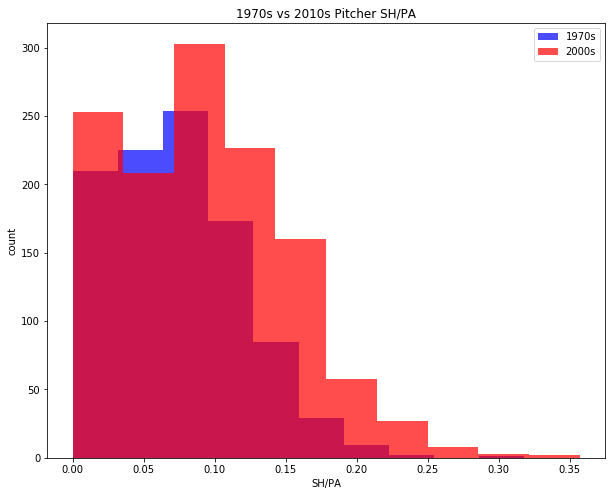

In [81]:
plot_vs_hist(pb_70s_noplayer, pb_00s_noplayer, "SH/PA")

In [82]:
print("95% CI for difference of means(2000s - 1970s): SH/PA\n", CI_SHPA_95)
print("90% CI for difference of means(2000s - 1970s): SH/PA\n", CI_SHPA_90)

95% CI for difference of means(2000s - 1970s): SH/PA
 (0.015657355012112472, 0.02474562009818031)
90% CI for difference of means(2000s - 1970s): SH/PA
 (0.01638793130936079, 0.024015043800931994)


Here we have some interesting results. Pitchers apparently have significantly more sac hits per plate appearance in the 2000s than they do in the 1970s. This increase is statistically significant at the 95% confidence level.

#### Conclusion

I have disproved my hypothesis. Two commonly used statistics for analyzing batting performance, OBP and SLG, show no statistically significant difference between the 1970s and 2010s for pitchers. I am surprised by this result and I think it bears further investigation. Someone has probably analyzed the difference between the value of a pitcher's batting and the value of a pitcher's pitching which is worth looking into. I had no expectations for the sac hits per plate appearance but it provided another interesting result. Pitchers seem to be sac bunting more than they did in the 70s. The value of pitcher's bunting as opposed to going for regular hits is also worth analyzing as a future project.

I am fairly confident that my data was both of high enough quality and filtered correctly to analyze the information that I wanted to analyze. SH/PA is not a fantastic statistic, and I think I would have also liked to compare bunt _attempts_ per plate appearance as an additional analysis of this behavior, however I don't think this information is available going back to the 1970s.